In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import statsmodels.api as sm

**Creating the dataset**

In [2]:
X , y = make_regression(n_samples=100 , n_features=3 , n_targets=1 , noise=10)

In [3]:
X = pd.DataFrame(X , columns=['X1' , 'X2' , 'X3'])
y = pd.DataFrame(y , columns=['Target'])

In [4]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=23)

In [5]:
X_train

,X1,X2,X3
85,-0.937377,1.153741,1.430530
28,-1.095252,0.511810,-1.263312
8,0.757416,0.376158,0.176244
11,0.426921,1.004910,0.711263
63,0.493725,-0.096175,0.888534
...,...,...,...
31,0.697427,2.070070,-1.650482
54,0.454659,-1.696861,1.894290
73,-0.311581,-0.017273,1.463911
40,-1.175225,-0.575798,-0.810977


**Model Building**

In [6]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [7]:
model = sm.OLS(y_train , X_train).fit()

In [8]:
y_pred = model.predict(X_test)
y_pred

26   -174.039098
80   -147.135907
82    -95.360723
68   -148.355183
77      9.704288
37     49.065946
3      84.973287
55    133.963770
20   -130.588316
17    -47.240441
72    238.111973
24    198.965541
71    -44.373071
87    -88.365001
89    -74.309426
29     75.908514
9     301.701379
67    -20.840329
42    -71.341376
94    157.169368
dtype: float64

**Evaluation**

In [9]:
r2_score(y_test , y_pred)

0.9946186387252336

In [10]:
mean_squared_error(y_test , y_pred)

96.32215968217155

In [11]:
np.sqrt(mean_squared_error(y_test , y_pred))

9.814385344084037

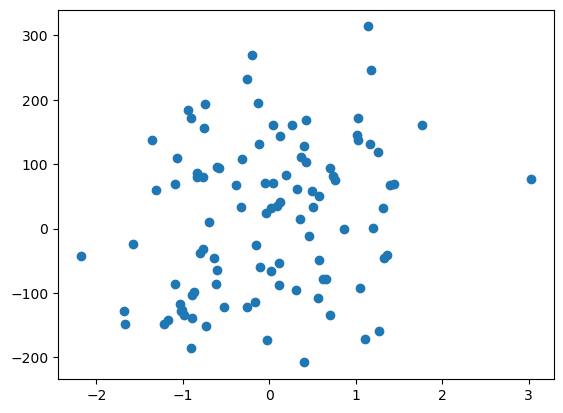

In [17]:
plt.scatter(x = X['X1'] , y = y['Target'])

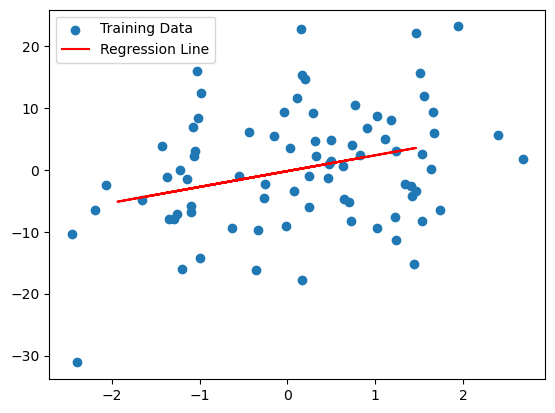

In [98]:
plt.scatter(X_train['Input'] , y_train ,label = 'Training Data')
plt.plot(X_test['Input'] , y_pred ,color='red',  label = 'Regression Line')
plt.legend()

**Assumptions**
* Linear Relationship

In [30]:
X.columns

Index(['X1', 'X2', 'X3'], dtype='object')

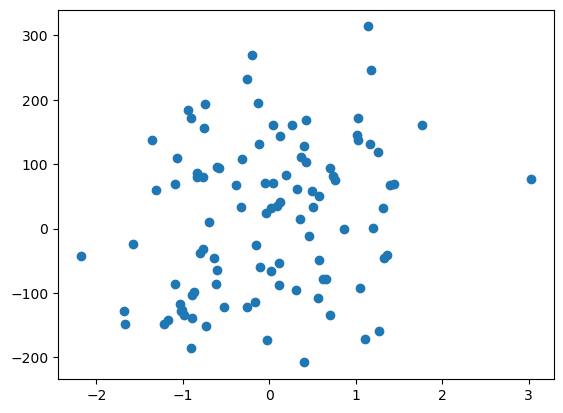

In [32]:
plt.scatter(X['X1'] , y)

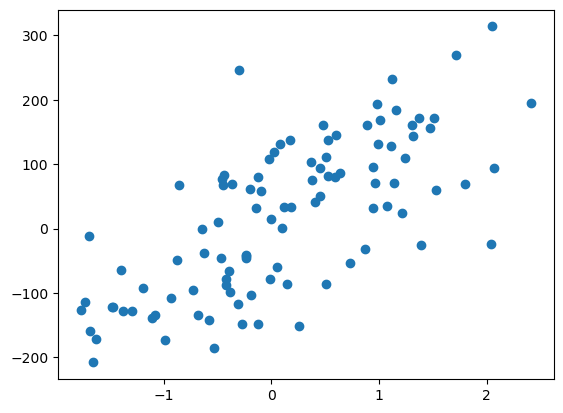

In [33]:
plt.scatter(X['X2'] , y)

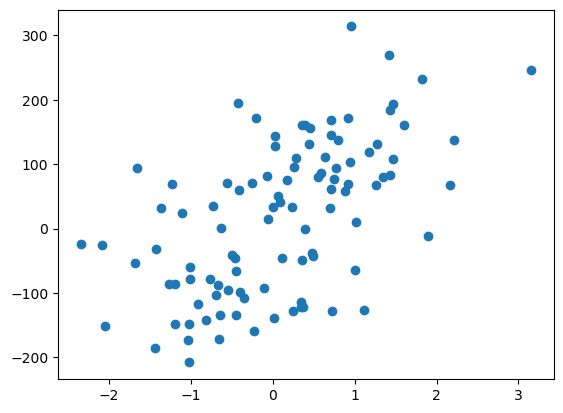

In [34]:
plt.scatter(X['X3'] , y)

* Independent/Multicolinearity
#There should not be relationship between input features

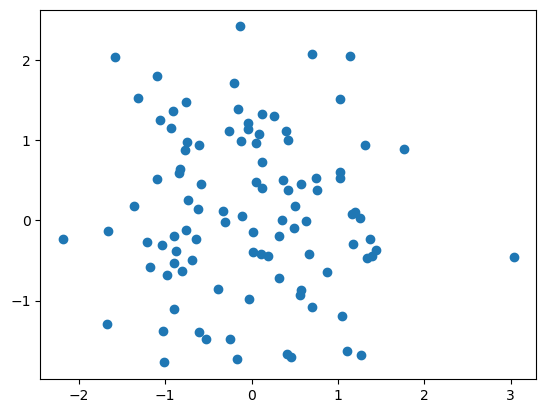

In [35]:
plt.scatter(X['X1'] , X['X2'])

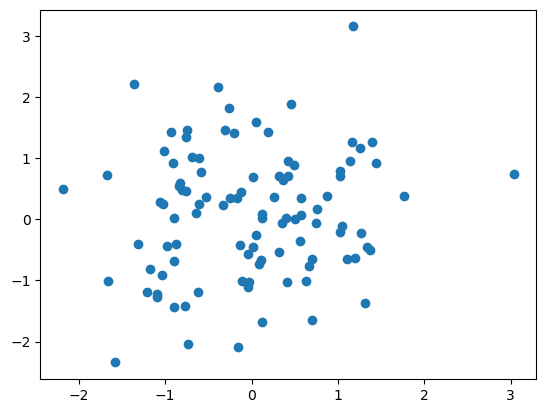

In [36]:
plt.scatter(X['X1'] , X['X3'])

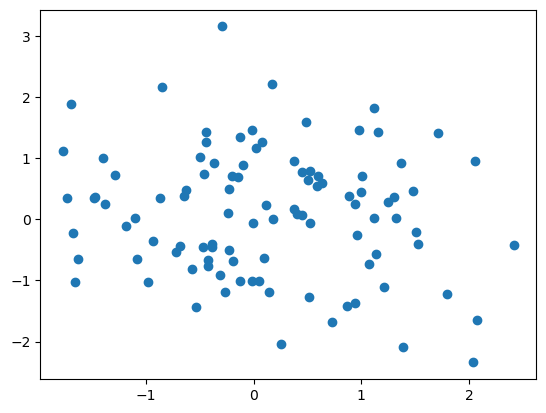

In [37]:
plt.scatter(X['X2'] , X['X3'])

* Normality

In [40]:
resid = model.resid

<Axes: ylabel='Density'>

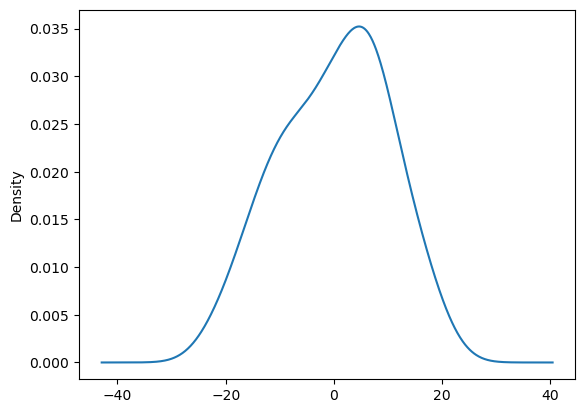

In [41]:
resid.plot(kind='kde')

* Equal varinace / Homoscedasticity

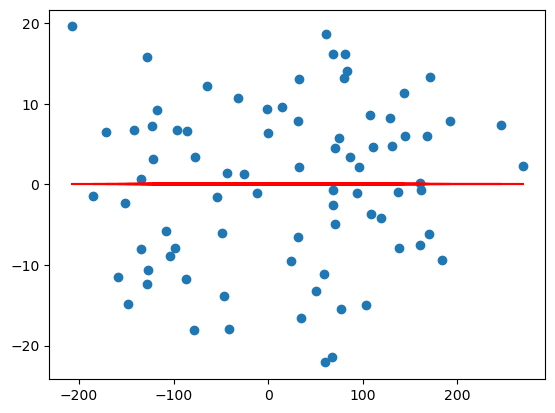

In [42]:
plt.scatter(y_train , resid)
plt.plot(y_train,[0]*y_train , color='red')

* No Auto correlation

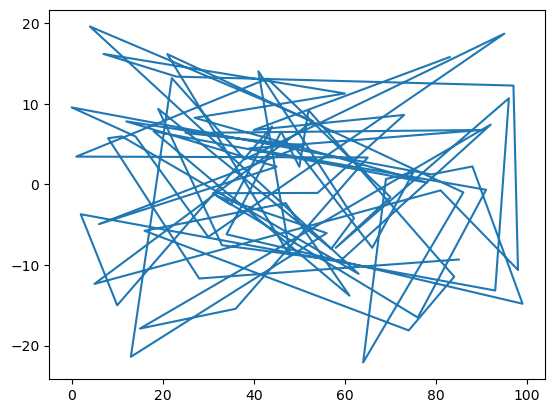

In [43]:
plt.plot(resid.index , resid)

* Error should be independant of input feature
#There should not be relationhip between resuals and inputs

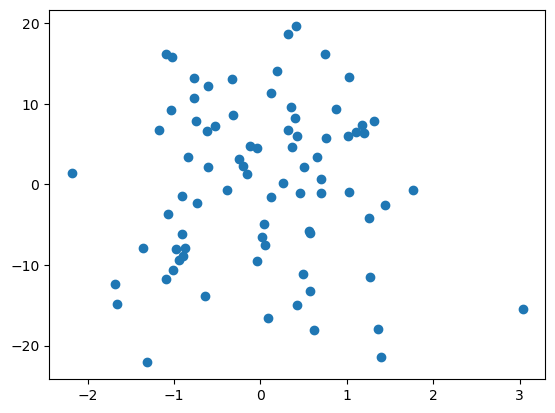

In [44]:
plt.scatter(X_train['X1'] ,resid)

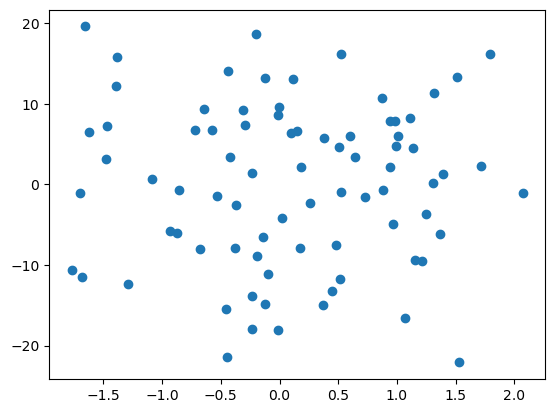

In [45]:
plt.scatter(X_train['X2'] ,resid)

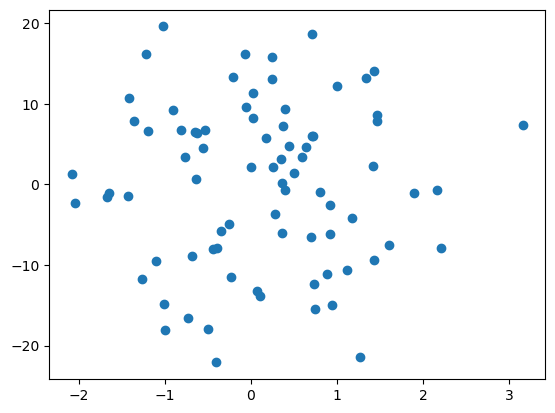

In [46]:
plt.scatter(X_train['X3'] ,resid)